In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle 
from datetime import time
import seaborn as sns
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,HistGradientBoostingClassifier,BaggingClassifier
from sklearn.ensemble import  AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
sns.set()

In [2]:
df =  pd.read_csv('/Users/vipulgotiwale/College/Bdt Project/Realtime-trafiic-Mangement/data/Traffic.csv')

In [3]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [4]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [6]:
df['Time'] = pd.to_datetime(df['Time'])
df['Time'] = df['Time'].dt.time


/var/folders/jc/dkht_0xj1gj8mjclb9vt5gnm0000gn/T/ipykernel_3293/1319676327.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [7]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,00:00:00,10,Tuesday,31,0,4,4,39,low
1,00:15:00,10,Tuesday,49,0,3,3,55,low
2,00:30:00,10,Tuesday,46,0,3,6,55,low
3,00:45:00,10,Tuesday,51,0,2,5,58,low
4,01:00:00,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
2971,22:45:00,9,Thursday,16,3,1,36,56,normal
2972,23:00:00,9,Thursday,11,0,1,30,42,normal
2973,23:15:00,9,Thursday,15,4,1,25,45,normal
2974,23:30:00,9,Thursday,16,5,0,27,48,normal


<Axes: xlabel='Time', ylabel='Count'>

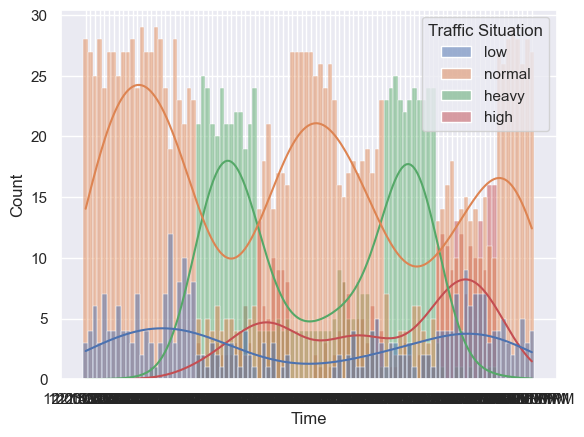

In [165]:
sns.histplot(df,x='Time',hue='Traffic Situation',kde=True)

<Axes: xlabel='Day of the week', ylabel='Count'>

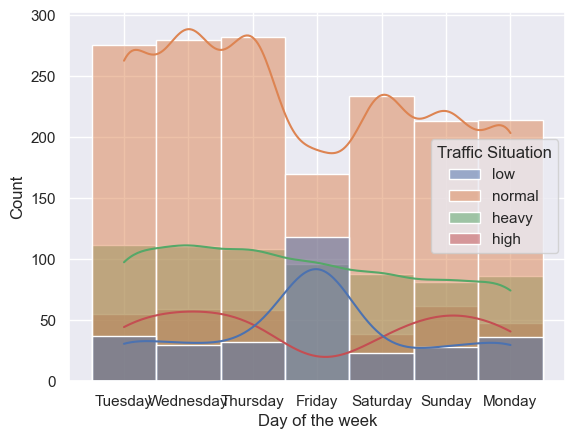

In [166]:
sns.histplot(df,x='Day of the week',hue='Traffic Situation',kde=True)

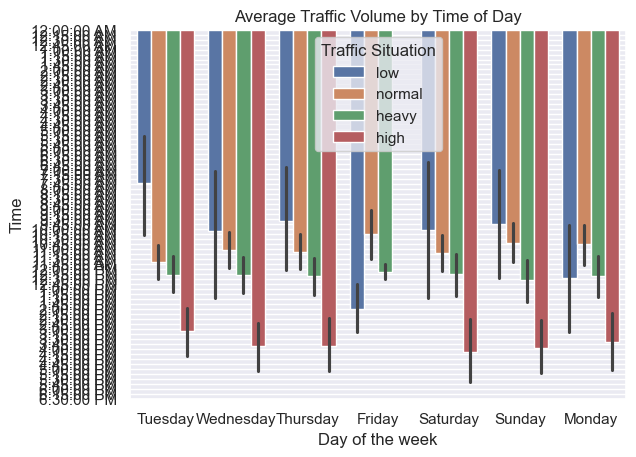

In [167]:
import seaborn as sns

sns.barplot(data=df, x='Day of the week', y='Time', hue='Traffic Situation')
plt.title('Average Traffic Volume by Time of Day')
plt.show()


In [168]:
grouped_data = df.groupby(['Day of the week', 'Time'])['Traffic Situation'].value_counts(normalize=True).unstack(fill_value=0)


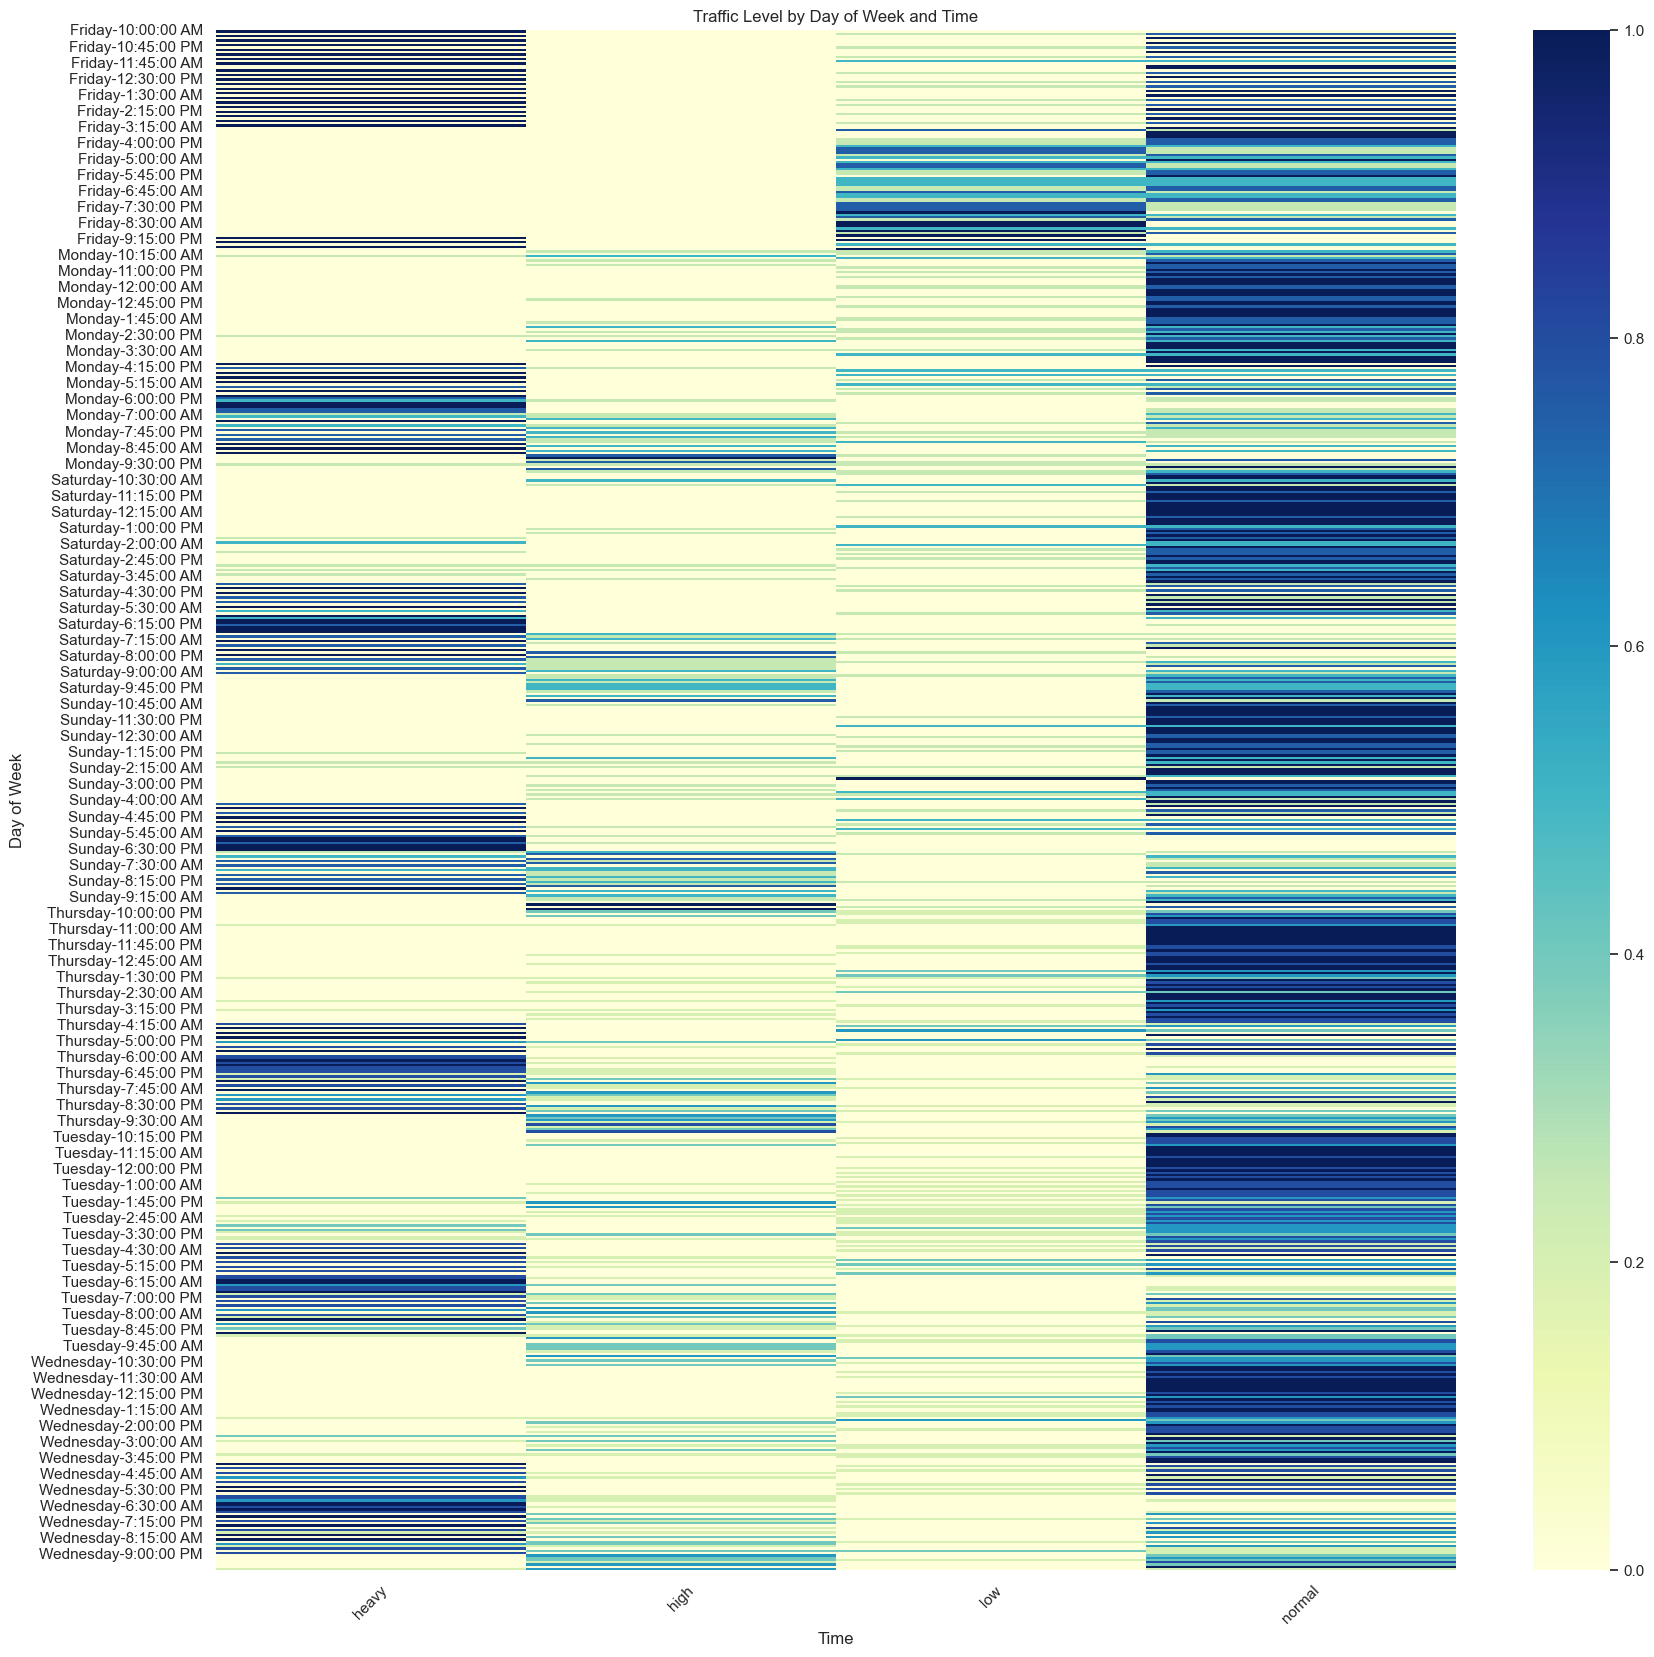

In [169]:

plt.figure(figsize=(20, 20))
sns.heatmap(grouped_data, cmap='YlGnBu', cbar=True)
plt.title('Traffic Level by Day of Week and Time')
plt.xlabel('Time')
plt.ylabel('Day of Week')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [9]:
df['Day of the week'] = df['Day of the week'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday': 6,'Sunday':7})

/var/folders/jc/dkht_0xj1gj8mjclb9vt5gnm0000gn/T/ipykernel_3293/198948614.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Day of the week'] = df['Day of the week'].replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday': 6,'Sunday':7})


In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [11]:
df['Traffic Situation'] = label_encoder.fit_transform(df['Traffic Situation'])


In [12]:
df['Hour'] = df['Time'].apply(lambda x: x.hour)
df['Minute'] = df['Time'].apply(lambda x: x.minute)


In [13]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour,Minute
0,00:00:00,10,2,31,0,4,4,39,2,0,0
1,00:15:00,10,2,49,0,3,3,55,2,0,15
2,00:30:00,10,2,46,0,3,6,55,2,0,30
3,00:45:00,10,2,51,0,2,5,58,2,0,45
4,01:00:00,10,2,57,6,15,16,94,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2971,22:45:00,9,4,16,3,1,36,56,3,22,45
2972,23:00:00,9,4,11,0,1,30,42,3,23,0
2973,23:15:00,9,4,15,4,1,25,45,3,23,15
2974,23:30:00,9,4,16,5,0,27,48,3,23,30


In [21]:
def RushHour(time):
    if 7 <= time <= 11:
        return 1
    elif 17 <= time <=21:
        return 1
    else:
        return 0

In [22]:
df['Rush_hour'] = df['Hour'].apply(RushHour)

In [25]:
print("Data type of 'Time' column:", df['Time'].dtype)

Data type of 'Time' column: object


In [27]:
label_encoder_time = LabelEncoder()

In [28]:
df['Time'] = label_encoder_time.fit_transform(df['Time'])

XGBClassifie: 
 [3.8864557e-04 8.5901469e-05 2.1696770e-04 4.2424555e-04 9.9314412e-04
 1.8707713e-01 2.6714858e-01 5.4256326e-01 0.0000000e+00 3.6855941e-04
 7.3351810e-04]


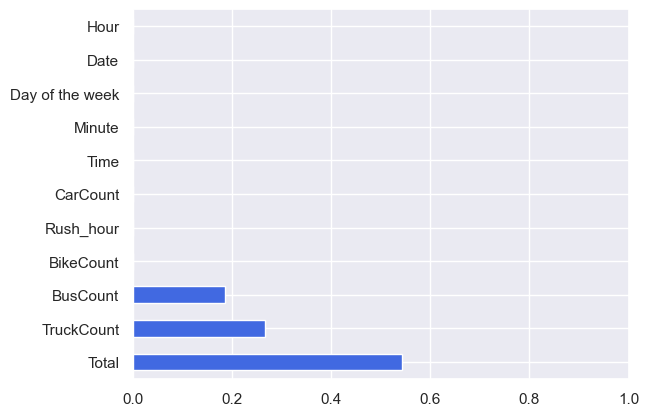

In [31]:

X_data_feature= df.drop(columns=['Traffic Situation'],axis=1)
y_data_feature= df['Traffic Situation']

model = [XGBClassifier()]

model = [model[i].fit(X_data_feature,y_data_feature) for i in range(len(model))]

num_chr = [12, 12, 10]

for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \n',
          model[i].feature_importances_)
    feat_importances = pd.Series(model[i].feature_importances_,
                                 index=X_data_feature.columns)
    feat_importances.nlargest(12).plot(kind='barh', color='royalblue')
    plt.xlim(0, 1.0)
    plt.show()

<catboost.co: 
 [ 0.89603287  0.22154489  0.21531376  1.99901442  0.31466965 16.71567183
 38.21885188 40.09175402  0.4346328   0.14456232  0.74795156]


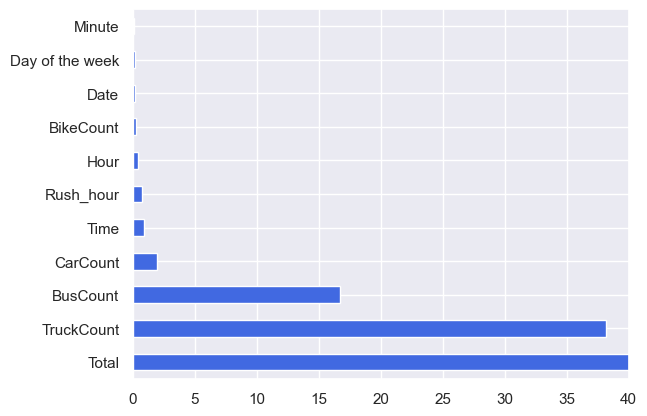

In [33]:


model = [CatBoostClassifier(logging_level='Silent')]

model = [model[i].fit(X_data_feature,y_data_feature) for i in range(len(model))]

num_chr = [12, 12, 10]

for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \n',
          model[i].feature_importances_)
    feat_importances = pd.Series(model[i].feature_importances_,
                                 index=X_data_feature.columns)
    feat_importances.nlargest(12).plot(kind='barh', color='royalblue')
    plt.xlim(0, 40)
    plt.show()

In [36]:
df = df.drop(['Minute','Day of the week'],axis=1)

In [37]:
df

,Time,Date,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour,Rush_hour
0,0,10,31,0,4,4,39,2,0,0
1,1,10,49,0,3,3,55,2,0,0
2,2,10,46,0,3,6,55,2,0,0
3,3,10,51,0,2,5,58,2,0,0
4,4,10,57,6,15,16,94,3,1,0
...,...,...,...,...,...,...,...,...,...,...
2971,91,9,16,3,1,36,56,3,22,0
2972,92,9,11,0,1,30,42,3,23,0
2973,93,9,15,4,1,25,45,3,23,0
2974,94,9,16,5,0,27,48,3,23,0


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [39]:
X = df.drop(['Traffic Situation'],axis=1)

In [40]:
y = df['Traffic Situation']

In [42]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

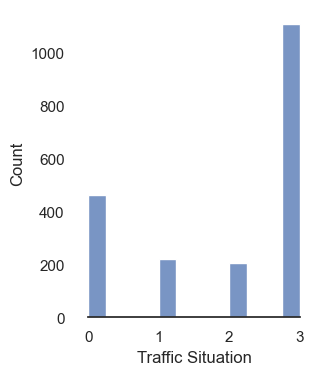

Skewness: -0.660872
Kurtosis: -1.309253


In [45]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(3, 4))
sns.histplot(y_train)
ax.xaxis.grid(False)

sns.despine(trim=True, left=True)
plt.show()

print("Skewness: %f" % y_train.skew())
print("Kurtosis: %f" % y_train.kurt())

In [64]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [118]:
models = [AdaBoostClassifier(),SGDClassifier(),
            RandomForestClassifier(),
            ExtraTreesClassifier(),
            KNeighborsClassifier(),
            LogisticRegression(),
            RidgeClassifier(),
            HistGradientBoostingClassifier(),
            BaggingClassifier(),
            GradientBoostingClassifier(),
            GaussianNB(),
            DummyClassifier(),
            SVC()]
estimators = [(f'model{i}', model) for i, model in enumerate(models)]

In [113]:
# estimators.append(('XGB',XGBClassifier()))
# estimators.append(('Cat_boost',CatBoostClassifier()))

In [129]:
# y = np.ravel(y) in case of input feature array error we can use it to make it into 1d

['model0',
 'model1',
 'model2',
 'model3',
 'model4',
 'model5',
 'model6',
 'model7',
 'model8',
 'model9',
 'model10',
 'model11',
 'model12']

In [127]:
k = []
l = []
for i in range(len(estimators)):
    k.append(estimators[i][0])
    l.append(estimators[i][1])

In [120]:
voting_clf = VotingClassifier(estimators=estimators, voting='hard')

In [121]:
cv_scores = cross_val_score(voting_clf, X_train, y_train, cv=5) 

/Users/vipulgotiwale/College/Bdt Project/Realtime-trafiic-Mangement/BDT/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/vipulgotiwale/College/Bdt Project/Realtime-trafiic-Mangement/BDT/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/vipulgotiwale/College/Bdt Project/Realtime-trafiic-Mangement/BDT/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/vipulgotiwale/College/Bdt Project/Realtime-trafiic-Mangement/BDT/lib/python3.9/si

In [122]:
cv_scores

array([0.95739348, 0.95238095, 0.93984962, 0.96482412, 0.94723618])

In [128]:


base_model_scores = []

# Evaluate each base model using cross-validation
for name, model in zip(k, l):
    scores = cross_val_score(model, X_train, y_train, cv=5)
    base_model_scores.append((name, scores.mean()))

# Sort the list of base model scores based on mean accuracy
base_model_scores.sort(key=lambda x: x[1], reverse=True)

# Print the performance of each base model
for name, score in base_model_scores:
    print(f"{name}: Mean Accuracy = {score:.4f}")


/Users/vipulgotiwale/College/Bdt Project/Realtime-trafiic-Mangement/BDT/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/vipulgotiwale/College/Bdt Project/Realtime-trafiic-Mangement/BDT/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/vipulgotiwale/College/Bdt Project/Realtime-trafiic-Mangement/BDT/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/vipulgotiwale/College/Bdt Project/Realtime-trafiic-Mangement/BDT/lib/python3.9/si

model9: Mean Accuracy = 0.9995
model7: Mean Accuracy = 0.9985
model8: Mean Accuracy = 0.9965
model2: Mean Accuracy = 0.9950
model3: Mean Accuracy = 0.9634
model12: Mean Accuracy = 0.9067
model5: Mean Accuracy = 0.8976
model4: Mean Accuracy = 0.8906
model10: Mean Accuracy = 0.8359
model1: Mean Accuracy = 0.8274
model6: Mean Accuracy = 0.7672
model0: Mean Accuracy = 0.5554
model11: Mean Accuracy = 0.5554


In [132]:
voting_clf.fit(X_train,y_train)

/Users/vipulgotiwale/College/Bdt Project/Realtime-trafiic-Mangement/BDT/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('model0', AdaBoostClassifier()),
                             ('model1', SGDClassifier()),
                             ('model2', RandomForestClassifier()),
                             ('model3', ExtraTreesClassifier()),
                             ('model4', KNeighborsClassifier()),
                             ('model5', LogisticRegression()),
                             ('model6', RidgeClassifier()),
                             ('model7', HistGradientBoostingClassifier()),
                             ('model8', BaggingClassifier()),
                             ('model9', GradientBoostingClassifier()),
                             ('model10', GaussianNB()),
                             ('model11', DummyClassifier()),
                             ('model12', SVC())])

In [133]:
y_pred =  voting_clf.predict(X_test)

In [135]:
print(accuracy_score(y_test,y_pred))

0.9684638860630722


So the gradient Boosting is the best performing in the whole mini batch

In [136]:
best_model = GradientBoostingClassifier()

In [138]:
best_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [139]:
pred = best_model.predict(X_test)

In [140]:
print(accuracy_score(y_test,pred))

0.9979654120040692


Saving all the model That are need

In [141]:
with open('./Artifacts/voting_classifier.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)
    for name, model in zip(k,l):
        pickle.dump(model, f)

In [142]:
with open('./Artifacts/GBA.pkl', 'wb') as f:
    pickle.dump(best_model, f)
    

In [143]:
with open('./Artifacts/label_encoder_time.pkl', 'wb') as f:
    pickle.dump(label_encoder_time, f)
    

In [144]:
with open('./Artifacts/label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [145]:
with open('./Artifacts/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)